# Visualizing measurement data over time in a movie

Out measurement data contained 60 patients where we measured their inflammation over 40 days.
Now we want to show the inflammation of all 60 patients for each day in a movie, where the days move on in time.

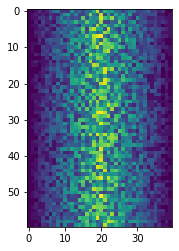

In [1]:
# import numpy for data read/write and manipulation
import numpy as np

# the data files are stored in another folder we used before, so we need to navigate to it
data = np.loadtxt(fname='../data/inflammation-01.csv', delimiter=',')

# import matplotlib.pyplot for data visualization
import matplotlib.pyplot as plt

# visualize the raw data using imshow() 
plt.imshow(data) # plot is stored in the variable 'image'
plt.show()

We now want to plot the data for all 60 patients (first dimension) for each day, where the days change in time.
Recall that slicing works like this:

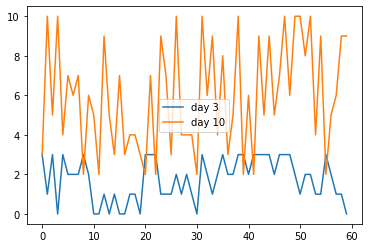

In [2]:
# all patient data on day 3
plt.plot(data[:,3], label='day 3')
# all patient data on day 10
plt.plot(data[:,10], label='day 10')
plt.legend()
plt.show()

We again import the animation package to create a movie and tell our program where to find the ffmpeg file. Let us also define our metadata and specify the writer.

In [3]:
from matplotlib.animation import FFMpegWriter
# change path again to reflect your complete file location!
plt.rcParams['animation.ffmpeg_path'] = '/Users/raffaelklees/PYTHON/jupyter_notebook/carpentry/03_animations_in_python_by_raffael/ffmpeg'

We know that our data contains information about 40 days (second dimension). We will generate 40 frames in our video.

In [10]:
print( data.shape )
print( data.shape[0] )
print( data.shape[1] )

(60, 40)
60
40


In [11]:
#generate an integer array [0, ... , 59] for our x-values
x = np.array( list( range( data.shape[0] ) ) )
print(x)
print(type(x))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
<class 'numpy.ndarray'>


The mp4-file inflammation_evolution.mp4 was created!


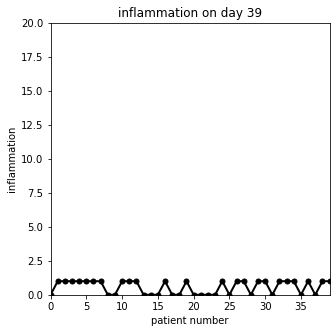

In [13]:
# meta data as before
my_meta_info = dict(title='patient inflammation over days', artist='swc')
writer = FFMpegWriter(fps = 5, metadata = my_meta_info) # 5 fps, 40 frames => 8 second movie

fig, axes = plt.subplots(figsize=(5,5), nrows=1, ncols=1)

axes.set_xlabel( 'patient number' )
axes.set_ylabel( 'inflammation' )
axes.set_xlim(0,39)
axes.set_ylim(0,np.max(data))

emptyplot, = axes.plot([],[], color = 'black', linestyle = 'solid', linewidth = 2, marker = 'o', markersize = 5)

name_of_my_video = 'inflammation_evolution.mp4'
resolution = 100 # in dpi

with writer.saving(fig, name_of_my_video, resolution):
    for t in range( data.shape[1] ):
        # note that we also update the title of the plot to show on which day we are
        axes.set_title( 'inflammation on day ' + str(t) )
        emptyplot.set_data( x , data[:,t] )
        writer.grab_frame()
        
print('The mp4-file',name_of_my_video,'was created!')
